## Session Agenda

- Problem Statement
  - Understanding the types of problems KNN is used to solve.

- Understanding KNN
  - Basic concept of KNN.
  - How KNN works and its simplicity in implementation.
  - Application and Usage

- Visualizing how KNN works
  - Understanding the concept of 'neighborhood' in data points.

- Distance Metrics
  - Different ways to measure distance (Euclidean, Manhattan, etc.).
  - Understanding Euclidean and Manhattan distance metric.

- Implementation of KNN
  - Step-by-step process of implementing KNN from scratch.
  - Understanding the algorithm.

- KNN using sklearn
  - How to implement KNN using the scikit-learn library.

- Weighted KNN
  - Introduction to the concept of weighted voting.

- Bias-Variance Trade-off
  - The impact of the value of K on model performance.

- Outliers
  - The impact of outliers on KNN.


## Problem statement




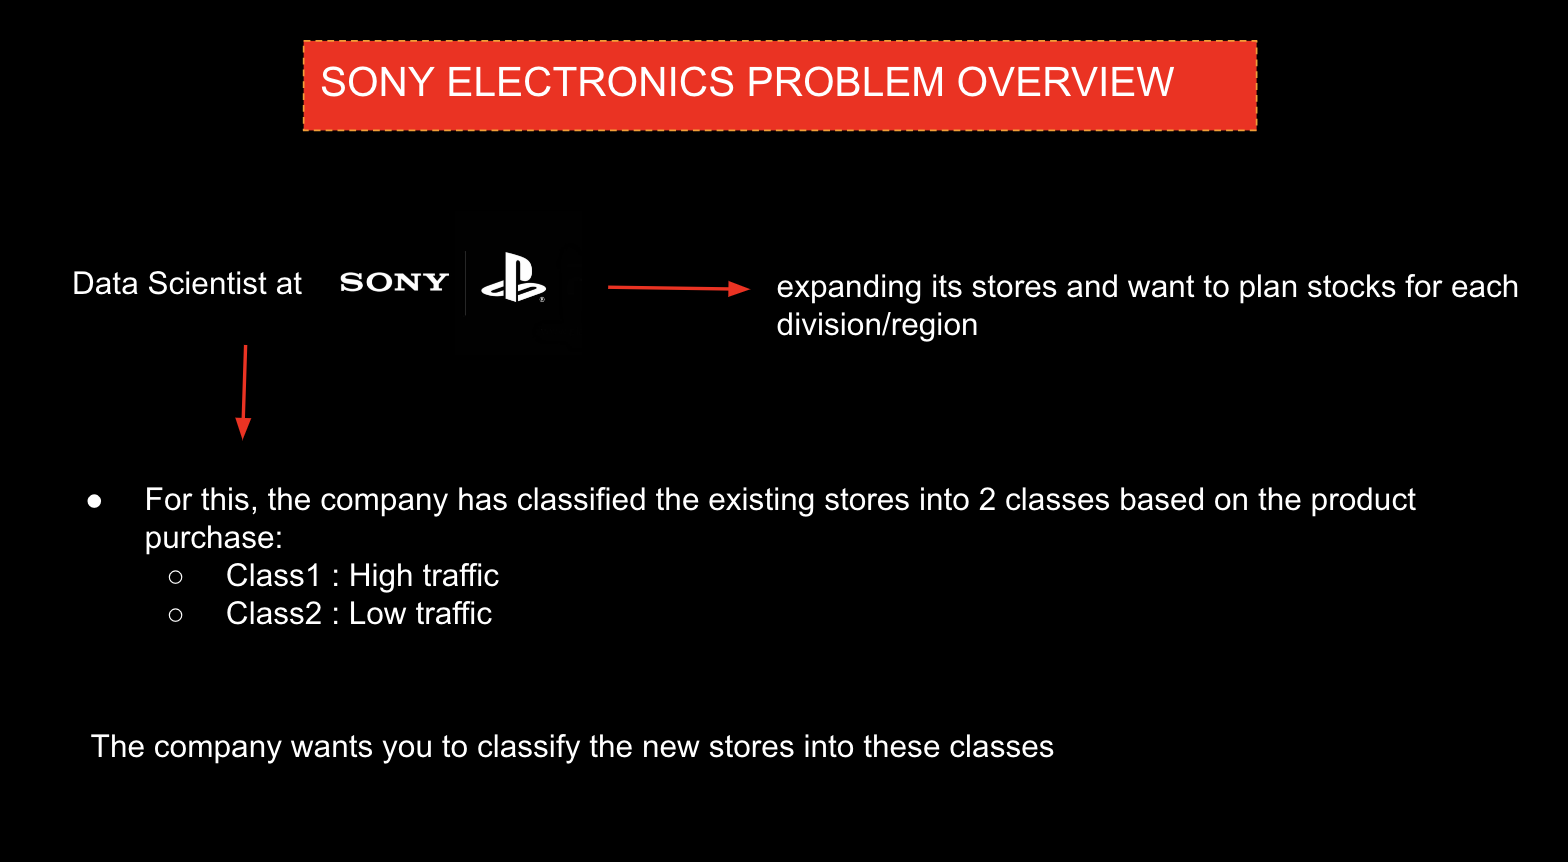

In [ ]:
import pandas as pd
import numpy as np

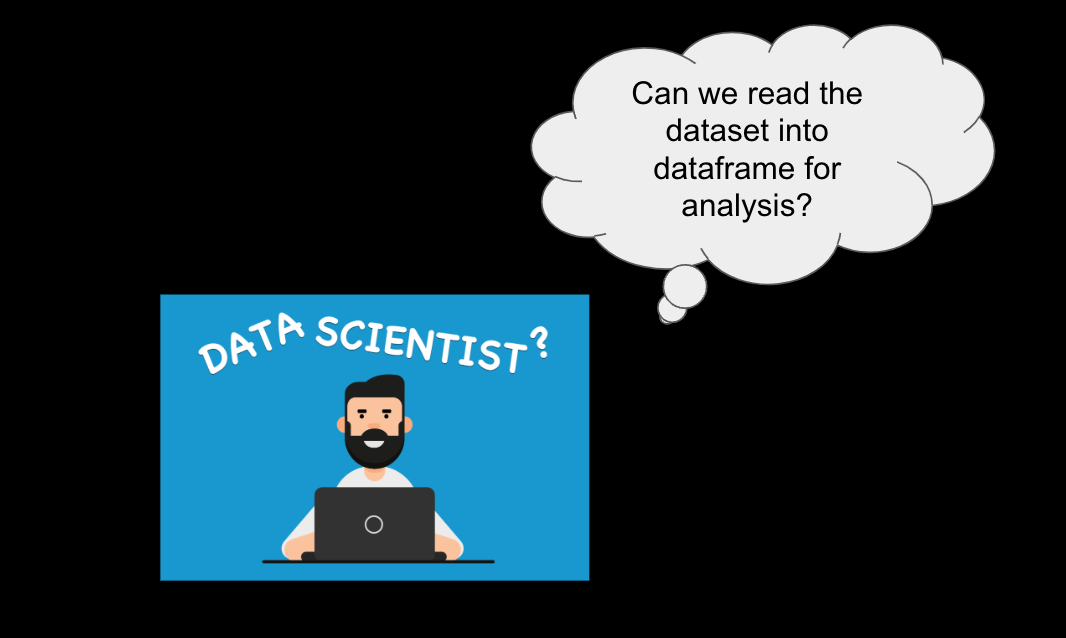

In [ ]:
!gdown https://drive.google.com/file/d/1eaLz3fS94r8WKeeaW_FNgSMNObpRwgNS/view?usp=sharing


/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1eaLz3fS94r8WKeeaW_FNgSMNObpRwgNS
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1eaLz3fS94r8WKeeaW_FNgSMNObpRwgNS/view?usp=sharing
To: /content/view?usp=sharing
83.7kB [00:00, 41.3MB/s]


In [ ]:
!wget "https://drive.google.com/uc?id=1eaLz3fS94r8WKeeaW_FNgSMNObpRwgNS" -O KNN_Gadget_Dataset.csv

--2024-05-27 15:40:10--  https://drive.google.com/uc?id=1eaLz3fS94r8WKeeaW_FNgSMNObpRwgNS
Resolving drive.google.com (drive.google.com)... 142.251.172.113, 142.251.172.138, 142.251.172.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.172.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eaLz3fS94r8WKeeaW_FNgSMNObpRwgNS [following]
--2024-05-27 15:40:10--  https://drive.usercontent.google.com/download?id=1eaLz3fS94r8WKeeaW_FNgSMNObpRwgNS
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.183.132, 2607:f8b0:4001:c64::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.183.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9127 (8.9K) [application/octet-stream]
Saving to: ‘KNN_Gadget_Dataset.csv’

KNN_Gadget_Dataset. 100%[===================>]   8.91K  --.-KB/s    in 0s      

2024-05-27 15:40:10 

In [ ]:
df=pd.read_csv('KNN_Gadget_Dataset.csv')
df.head()

,Division,TV,Laptop,Mobile_phoes,Headsets,Smart_Watch,Smart_Speakers,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
df['Division'] = df['Division'].str.replace('|', '', regex=False).astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Division        267 non-null    float64
 1   TV              267 non-null    int64  
 2   Laptop          267 non-null    int64  
 3   Mobile_phoes    267 non-null    int64  
 4   Headsets        267 non-null    int64  
 5   Smart_Watch     267 non-null    int64  
 6   Smart_Speakers  267 non-null    int64  
 7   class           267 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 16.8 KB


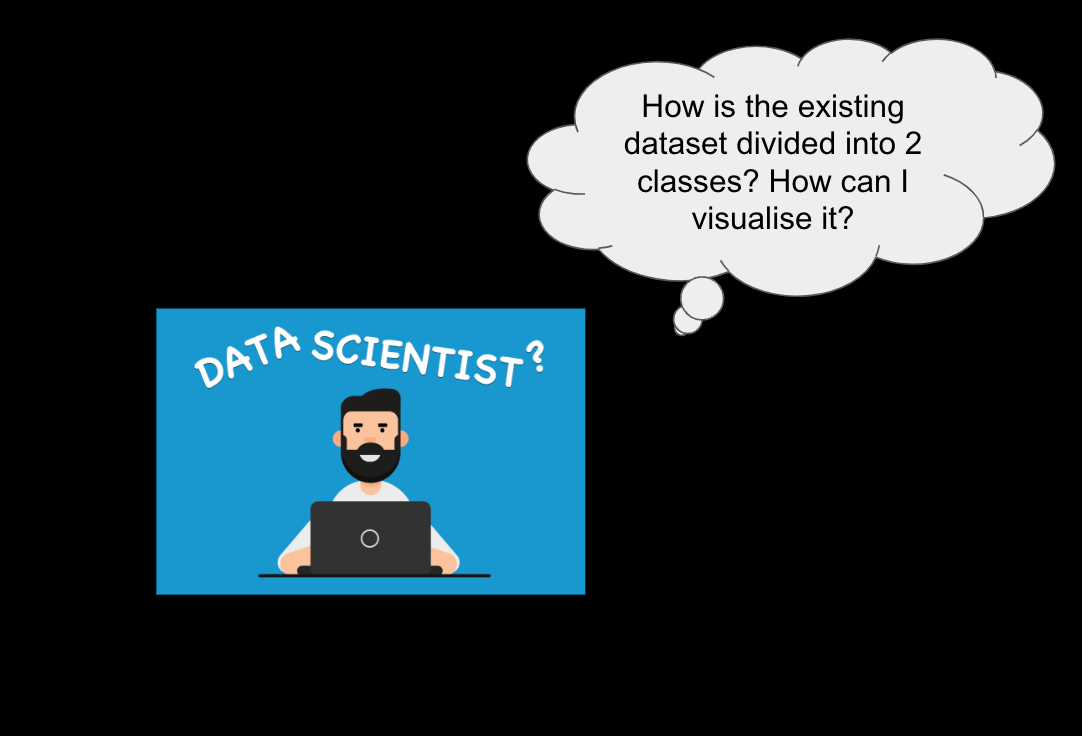

Yes, by plotting a histogram

<Axes: xlabel='class', ylabel='Count'>

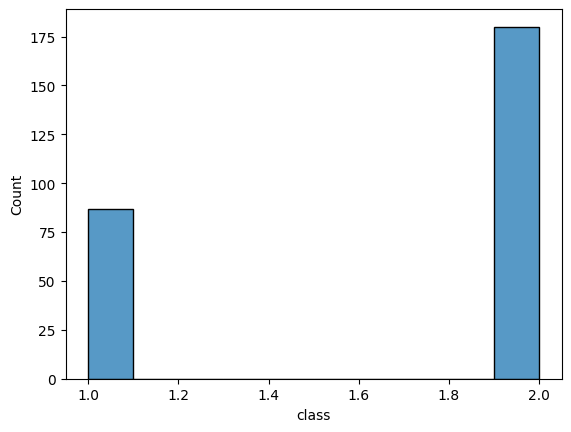

In [ ]:
import seaborn as sns
sns.histplot(data=df, x="class")

In [ ]:
X=df[['Division',	'TV',	'Laptop',	'Mobile_phoes',	'Headsets',	'Smart_Watch',	'Smart_Speakers']].copy()
y=df[['class']].copy()

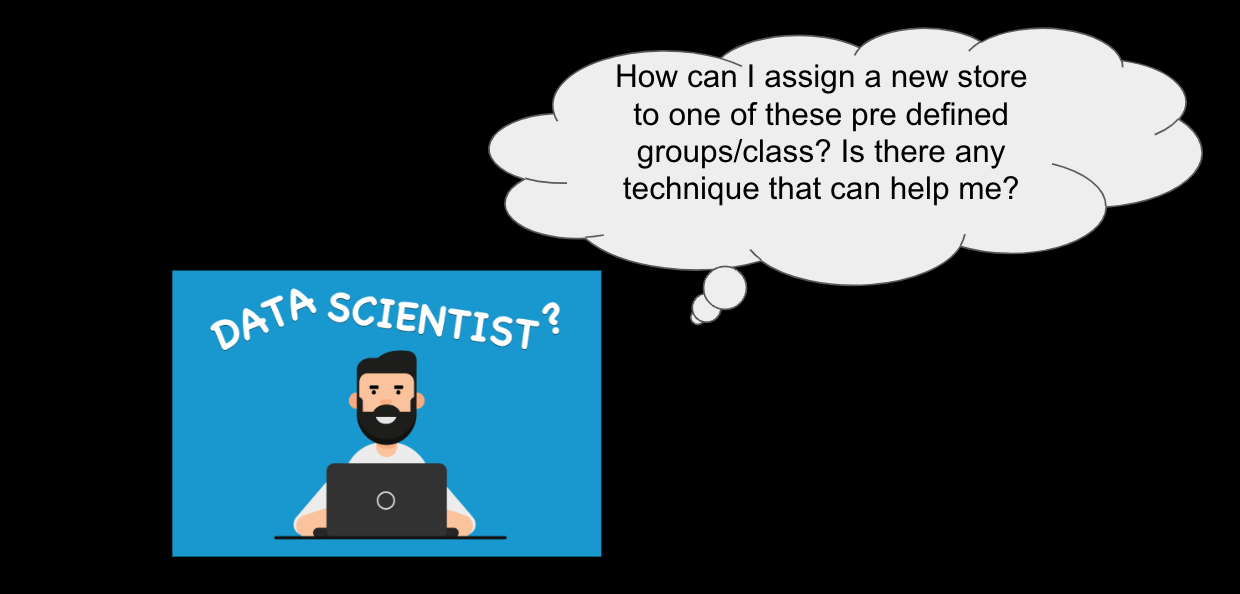

Yes, a supervised learning algorithm named K Nearest Neighbor(KNN) can help here

## K Nearest Neighbor (KNN)

####How does KNN work?



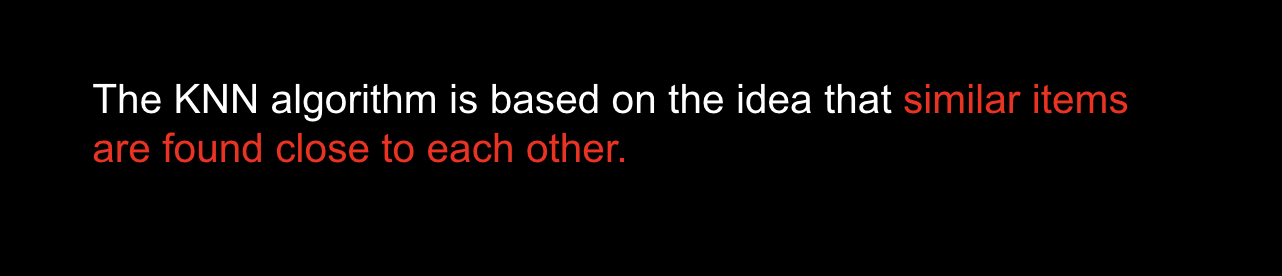


Imagine our training data contains a mix of blue and pink class data points.

####Consider a query data point 𝑥𝑞 in our test data. What class might 𝑥𝑞 belong to?

- If 𝑥𝑞 is close to the blue data points, it's likely to be classified as blue because it's surrounded by blue points.
- Conversely, if 𝑥𝑞 is near pink data points, it would probably be labeled as pink, reflecting its neighbors.




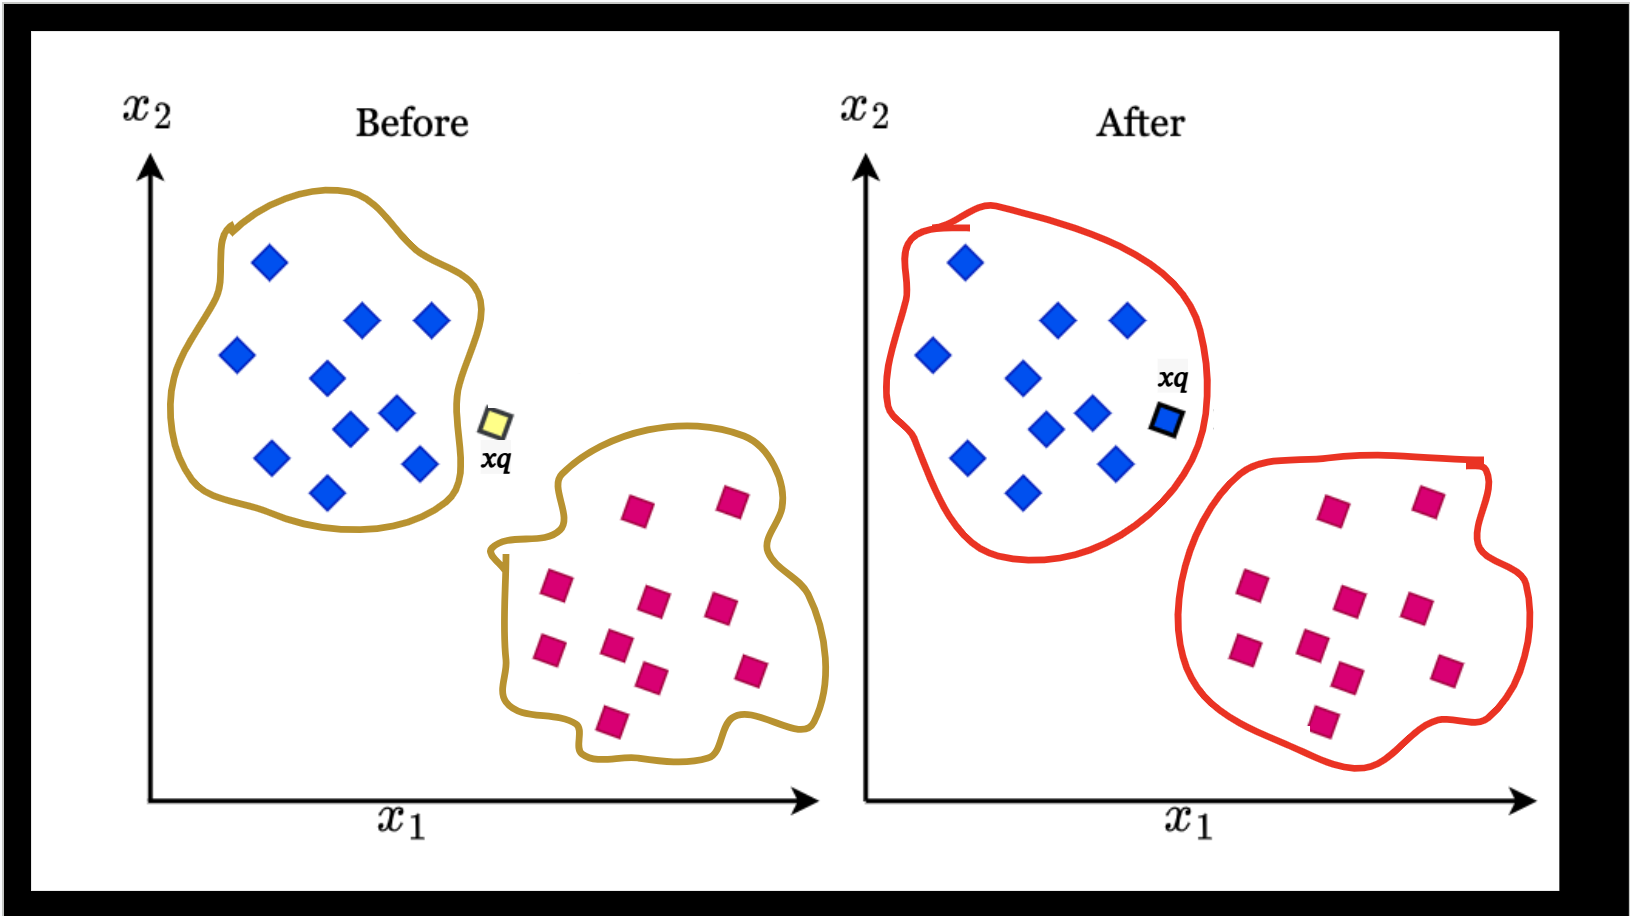

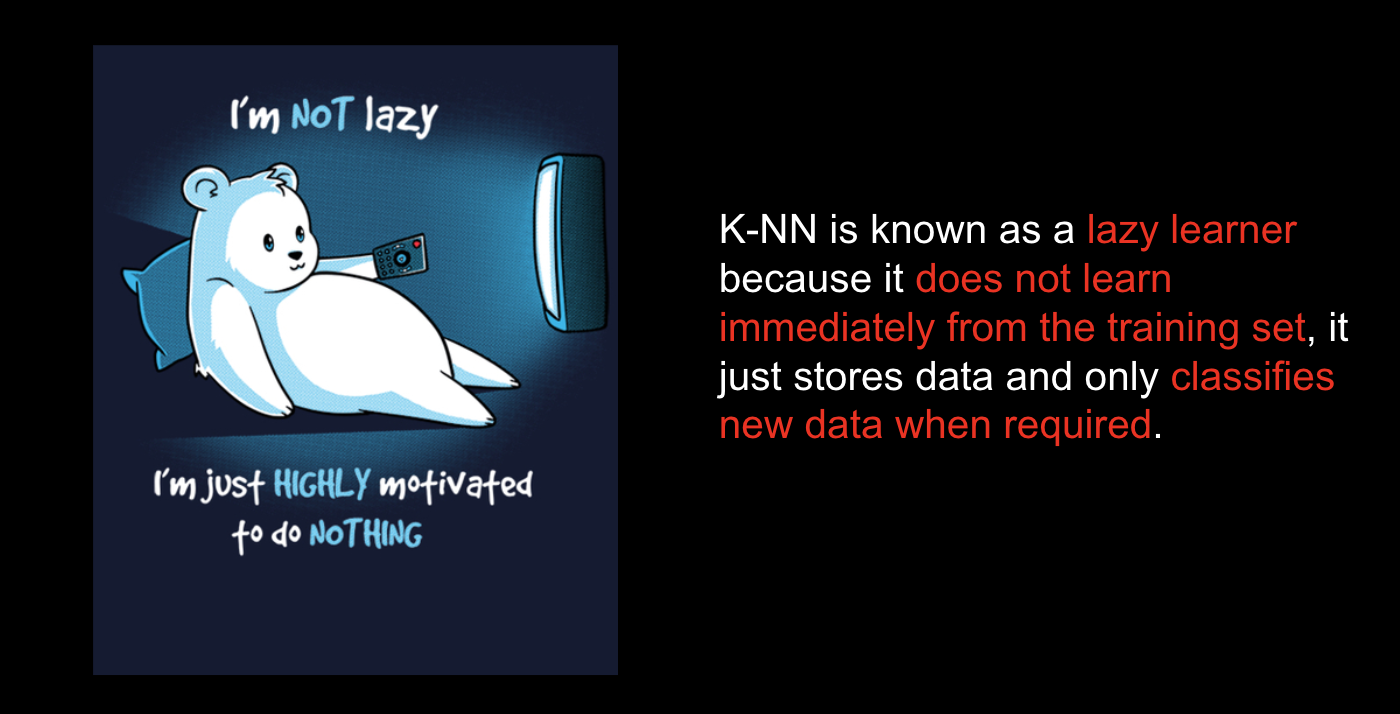

Let's see the KNN algorithm

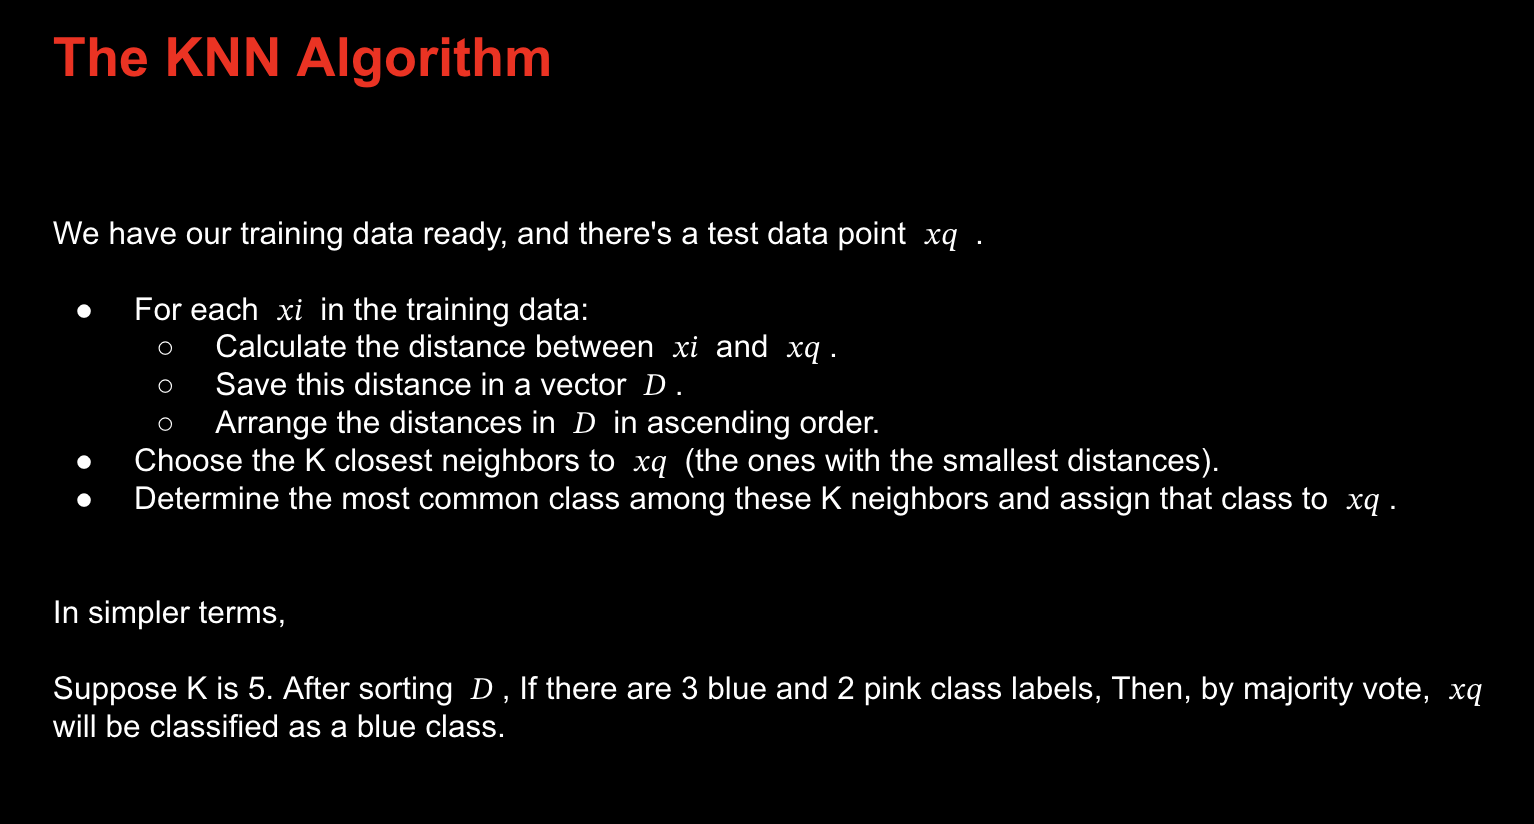

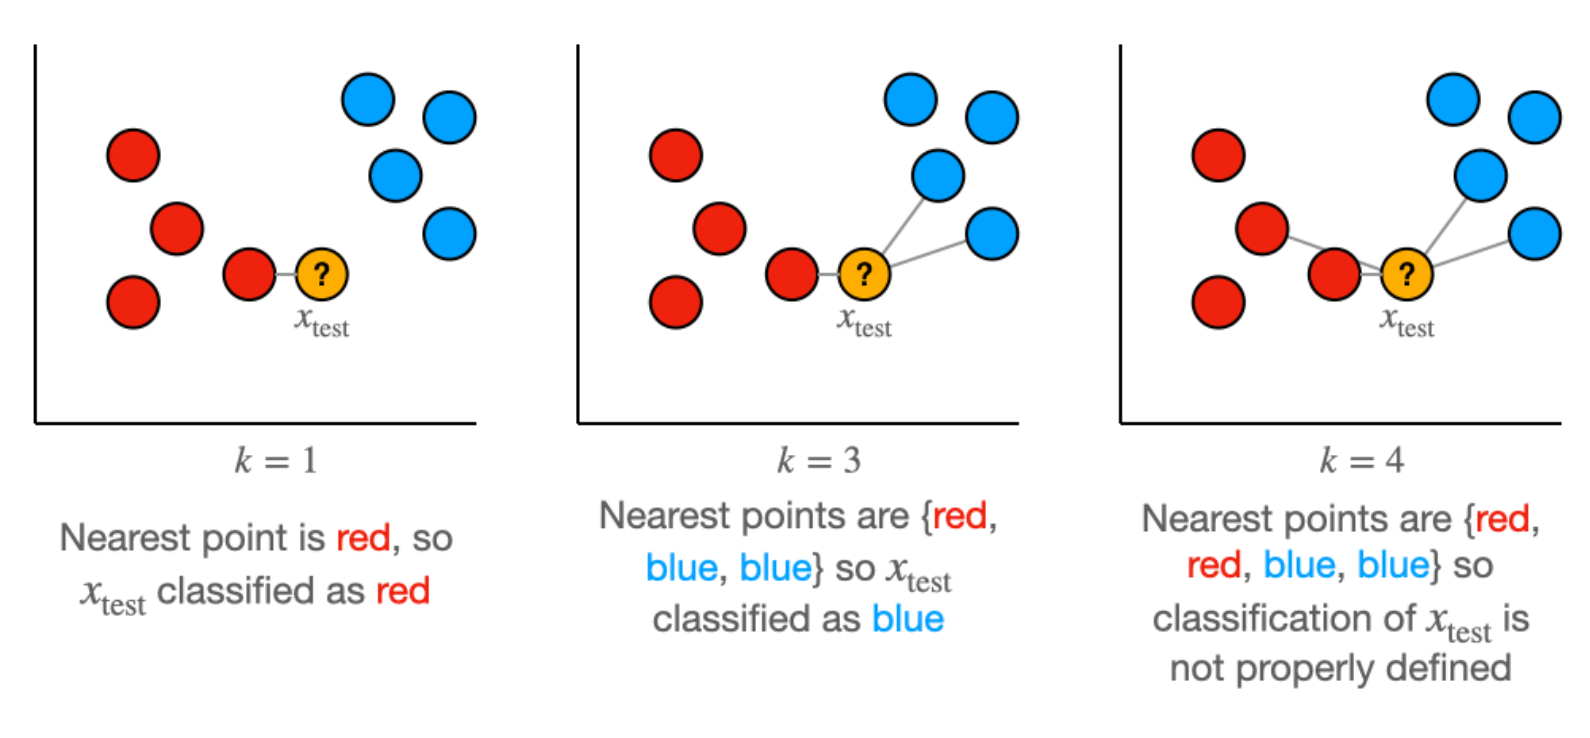


## How do we find the similar users?

Various distances/similarity metrics can be used
- Euclidean Distance
- Manhattan Distance


- The most basic distance measure can be done using **Euclidean Distance**
- It is the sum of the sqaure difference between each of the d-dimensional point of $x_1$ with $x_2$ and take a square root of it.
   
Below is the formula to calculate Euclidean distance:

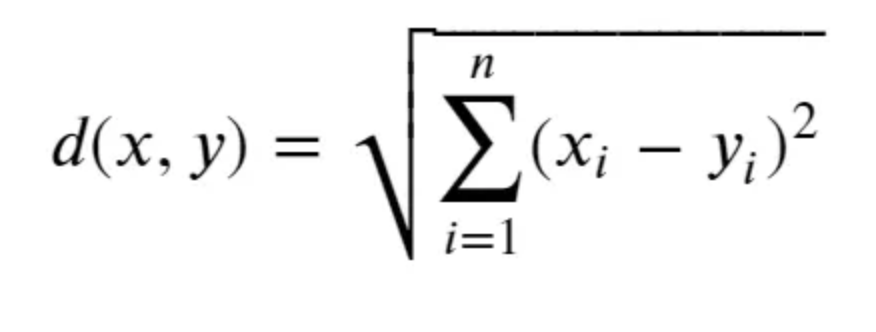

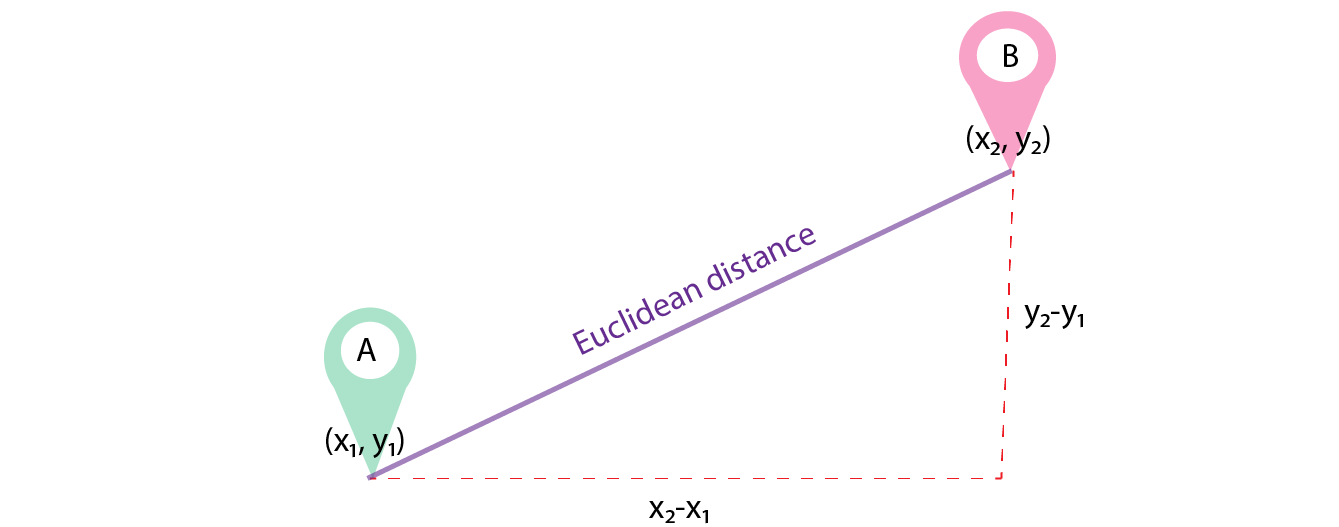

We now look into another distance measure metrics:  **Manhattan Distance** which is sum of all the absolute difference between each of the d-dimensional point of $x_1$ with $x_2$

####Understanding Manhattan distance

- We know between two feature points $x_1,x_2$, Euclidean distance will be the hypothesis of the right angle triangle

#### What will be the Manhattan Distance ?
- We are adding distance ($d_1$) along one axis (Here feature $f_1$ )
- and then the distance ($d_2$)along the other axis (Here feature $f_2$)
- Now summing up both $d_1$ and $d_2$ gives our Manhattan Distance



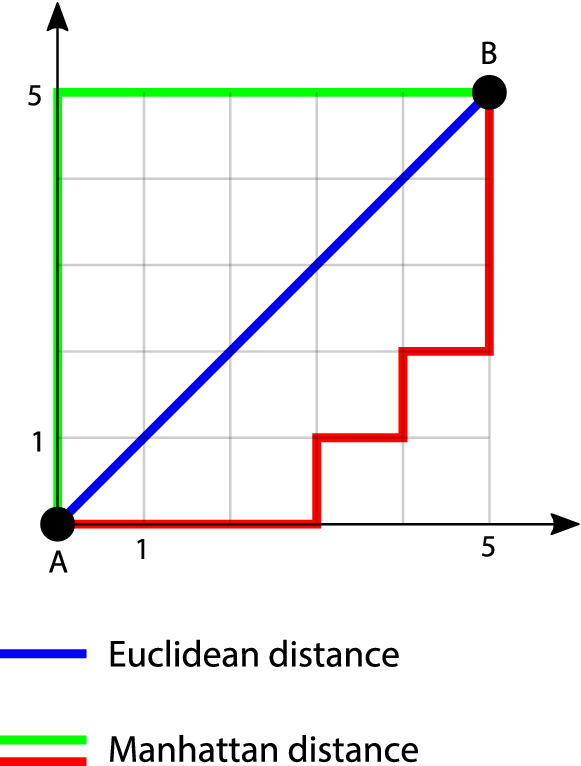

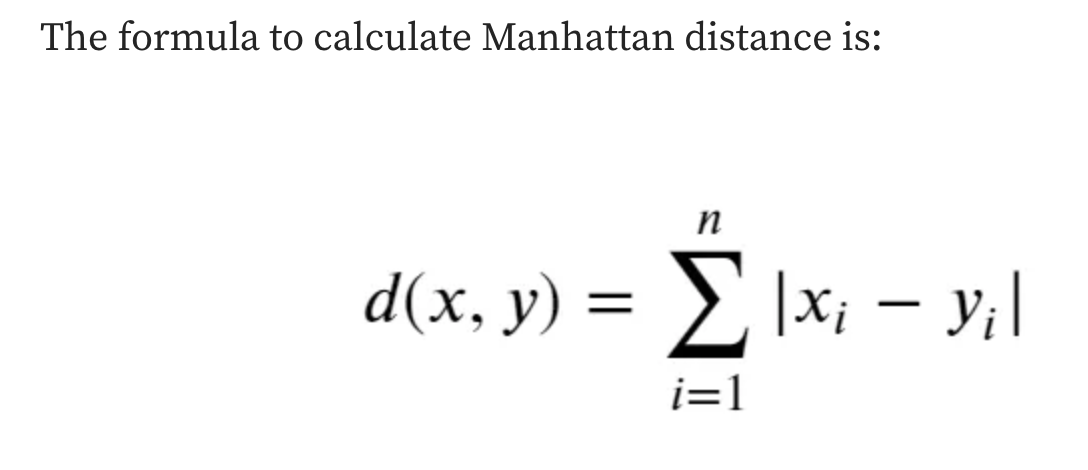

## Implementation of KNN



In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# reducing features to just 2 features
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X.shape

(267, 2)

In [ ]:
df2 = pd.DataFrame(X, columns=['f1', 'f2'])
df2['y'] = y

df2.head()

,f1,f2,y
0,-1536.864538,-3890.155341,2
1,-6951.600822,-5398.876946,2
2,-6264.094692,-6680.220399,2
3,3951.287005,-9483.481680,1
4,8385.399752,-16.996995,1


In [ ]:
print(pca.explained_variance_ratio_)

[0.59106867 0.40893133]


<Axes: xlabel='f1', ylabel='f2'>

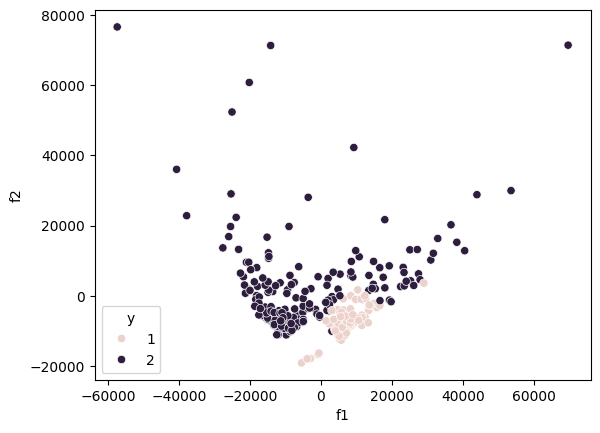

In [ ]:
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')

Here we can clearly see that the data is non-linearly seperable

Lets now split the data into train and test set by considering into these two features

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2[['f1', 'f2']].values,\
                                                    df2['y'].values,\
                                                    test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 2) (200,)
(67, 2) (67,)


Standardization of data

In [ ]:
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

In [ ]:
X_train = (X_train-mu)/sig
X_test = (X_test-mu)/sig

##kNN Implementation from Scratch

In [ ]:
def dist(x1,x2):
    """Euclidean distance between 2 vectors"""
    return np.sqrt(np.sum((x1-x2)**2))

# Test Time
def knn(X,Y,queryPoint,k=5):
    """Predict the class label for the query point"""

    distances = []
    m = X.shape[0]

    for i in range(m):
        d = dist(queryPoint,X[i])
        distances.append((d,Y[i]))

    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    #print(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)
    #print(classes_counts)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred)

taking the 100th test data as our $x_q$

In [ ]:
X_test[50]

array([ 0.51430645, -0.65034603])

Predicted class label for $x_q$

In [ ]:
knn(X_train, y_train, X_test[50])

1

Actual label for $x_q$

In [ ]:
y_test[50]

1

- notice that our model performed predicted the labels correctly

- Now lets see the accuracy of our KNN on test data

In [ ]:
y_pred = np.zeros(X_test.shape[0])

for i in range(X_test.shape[0]):
    y_pred[i] = knn(X_train, y_train, X_test[i])

print(f'Accuracy :{round(100*(y_pred == y_test).sum()/y_pred.shape[0], 2)}')

Accuracy :95.52


- We see how our KNN model performed quite well.

### KNN using Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Train, Validation, Test Split

In [ ]:
X_tcv, X_test, y_tcv, y_test = train_test_split(df2[['f1', 'f2']].values, df2['y'].values,test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_tcv, y_tcv,test_size=0.20, random_state=42)

In [ ]:
print(f'Training data: {X_train.shape}, {y_train.shape}')
print(f'Validation data:{X_val.shape}, {y_val.shape}')
print(f'Test data:{X_test.shape}, {y_test.shape}')

Training data: (170, 2), (170,)
Validation data:(43, 2), (43,)
Test data:(54, 2), (54,)


In [ ]:
knn = KNeighborsClassifier(metric='euclidean')

knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

Accuracy of KNN on Test data

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9629629629629629

Precision, Recall, F1-Score of KNN on test data

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.95      1.00      0.98        41

    accuracy                           0.96        54
   macro avg       0.98      0.92      0.95        54
weighted avg       0.96      0.96      0.96        54



Confusion Matrix of KNN on Test Data

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,index = np.unique(y_test), columns = np.unique(y_test) )

cm_df.head()

,1,2
1,11,2
2,0,41


<Figure size 800x800 with 0 Axes>

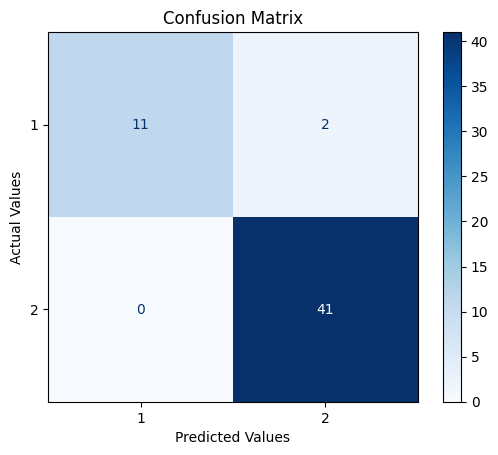

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Weighted KNN

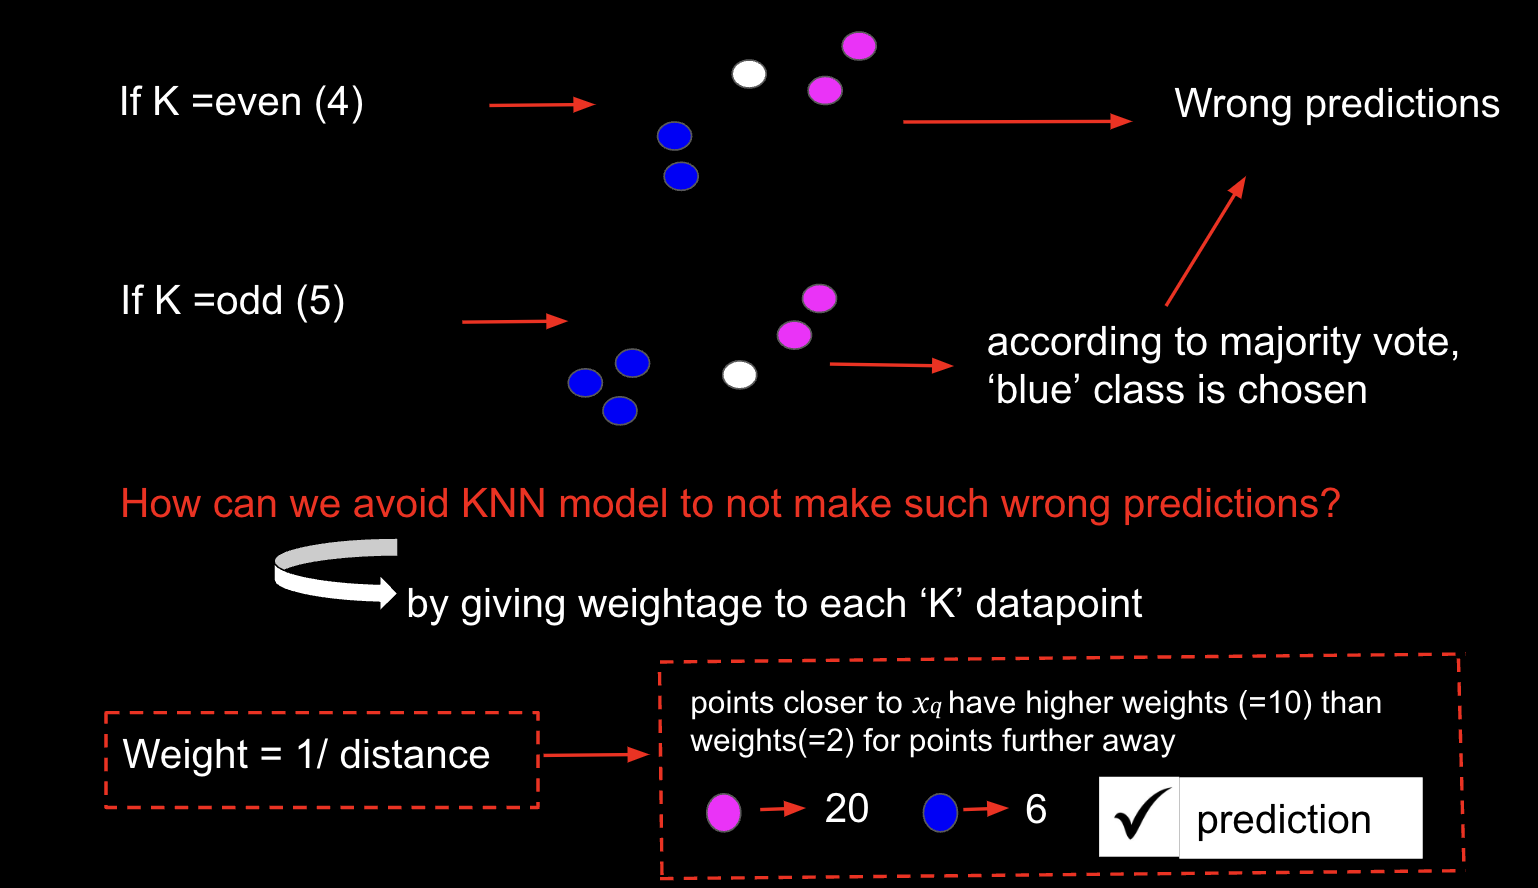

This way of using weights to find the class label for $x_q$ is what Weighted KNN is all about.

In [ ]:
w_knn = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')
w_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [ ]:
y_pred = w_knn.predict(X_test)
w_knn.score(X_test, y_test)

0.9629629629629629

Precision, Recall, F1-Score of KNN on test data

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.95      1.00      0.98        41

    accuracy                           0.96        54
   macro avg       0.98      0.92      0.95        54
weighted avg       0.96      0.96      0.96        54



## Bias-Variance Trade Off in KNN


Remember that, No training is involved in KNN,

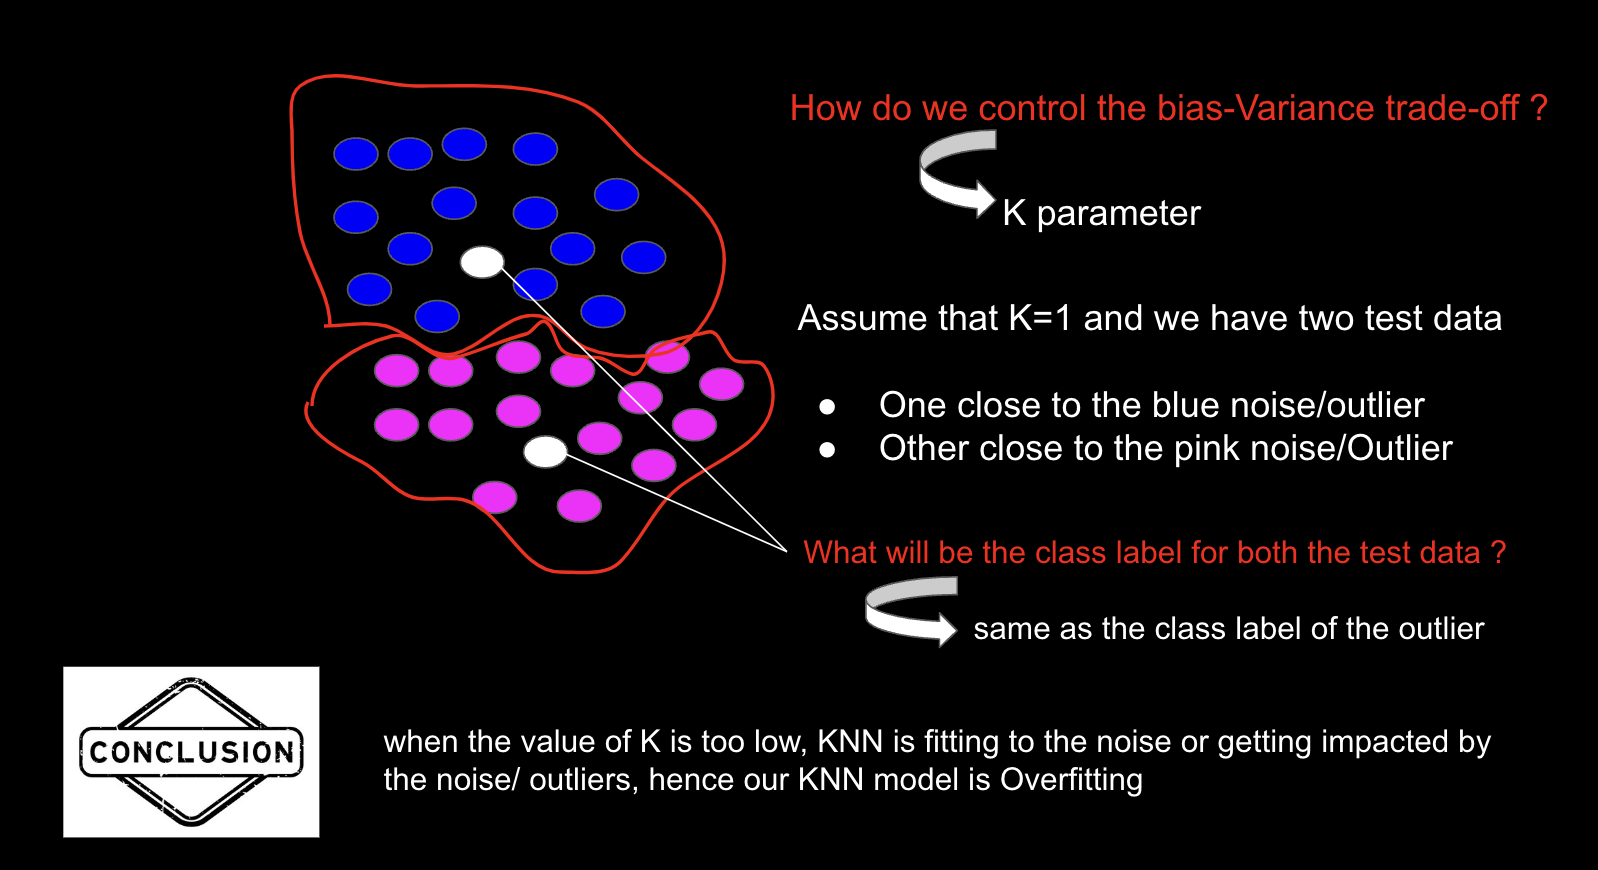

Now if plot error or any loss metrics and changing K Hyperparameter,
- We see how error is very high when KNN is overfitting and underfitting

- Hence, we pick that K ($K_{best}$) where errors is minimum


NOTE: we do all of this hyperparameter on our Validation data.



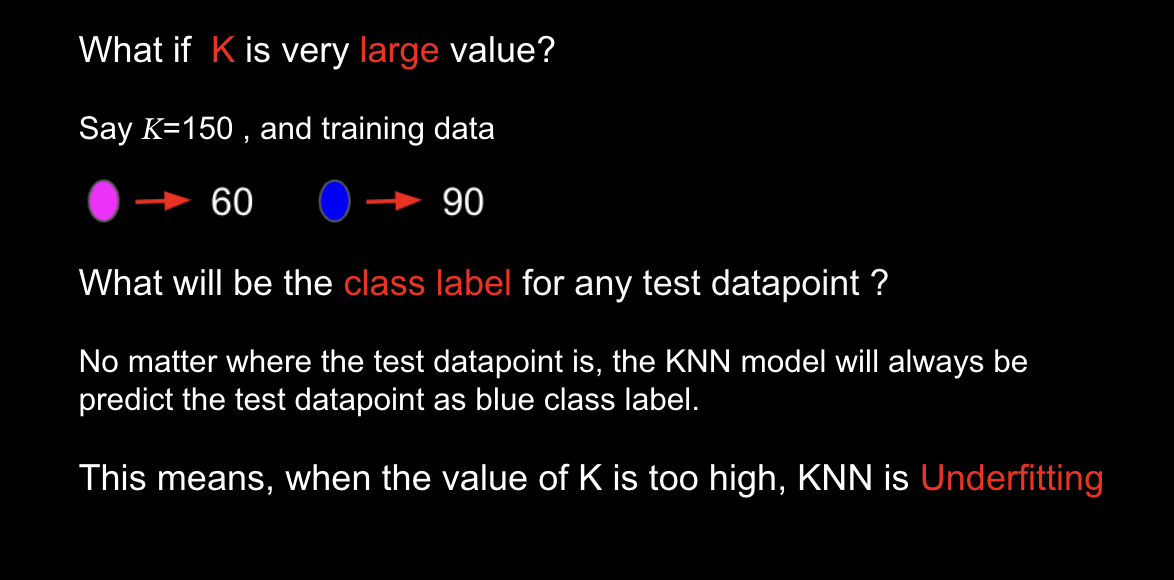

## Outliers

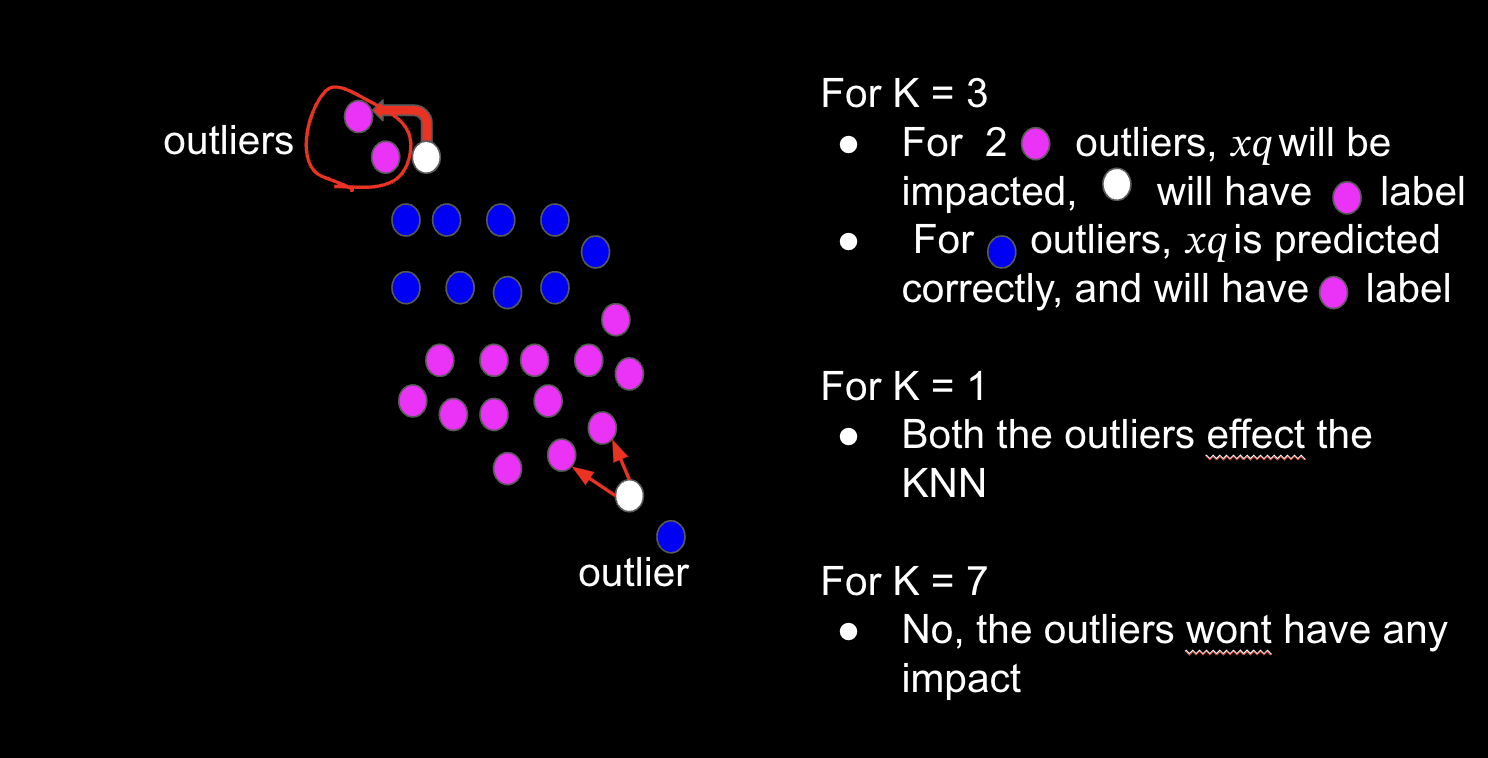

##Multi Class Classification with KNN

K-Nearest Neighbors (KNN) can handle multi-class problems by considering the classes of its nearest neighbors and choosing the most common class to classify data into more than two categories, like different colors which we saw earlier.

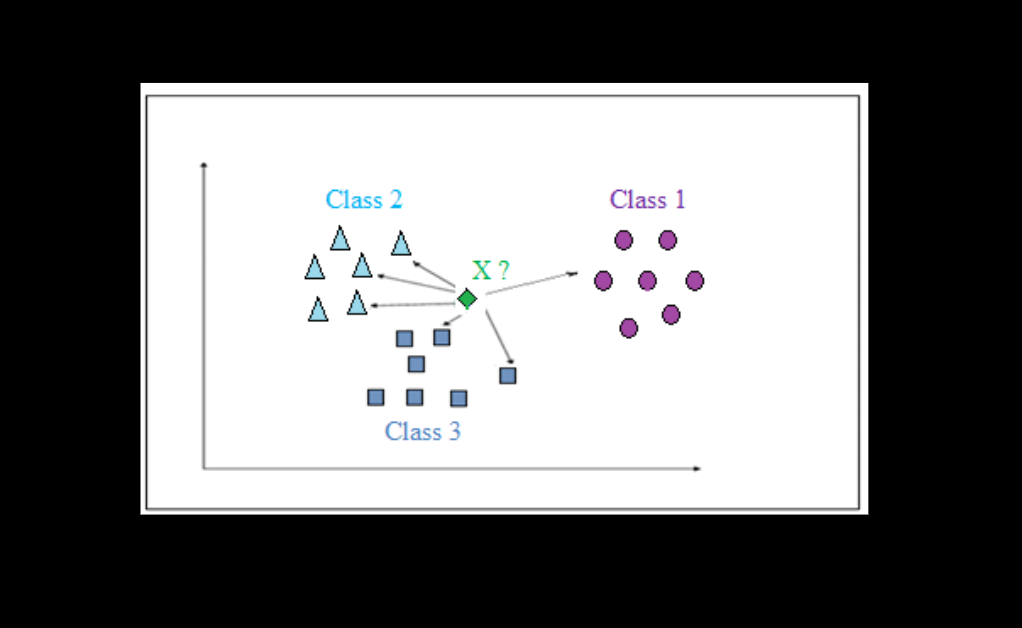

#Optional Content

## KNN based Imputation - Optional

### Missing Value Patterns
The absence of values is a cause of concern for real-life datasets.

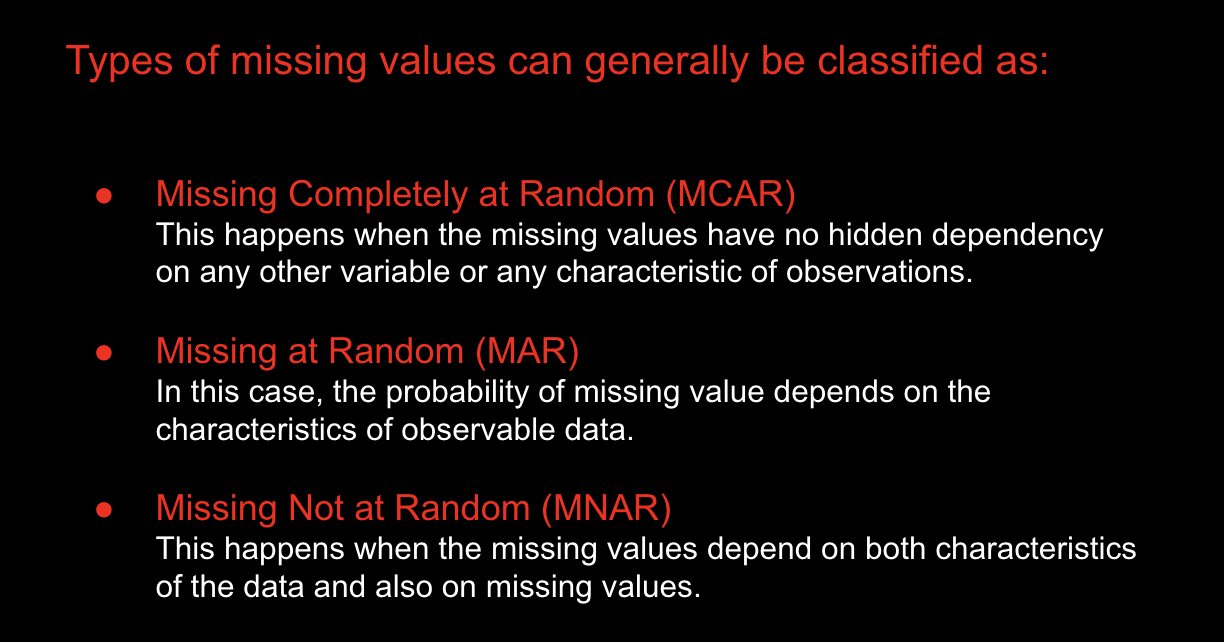

### KNN imputation


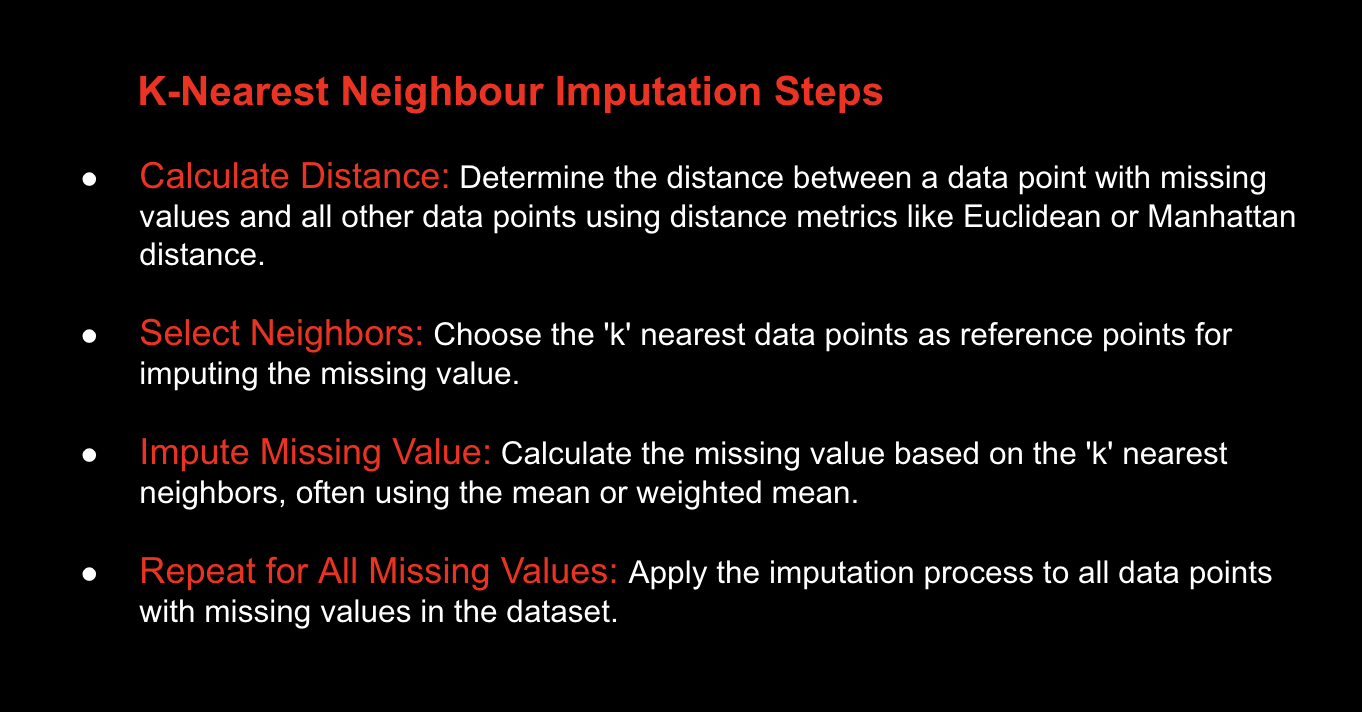

In [ ]:
!gdown 1bvfk_h3DQ_EOQaHuUfB6cOQjHmZbcHm1
#https://drive.google.com/file/d/1bvfk_h3DQ_EOQaHuUfB6cOQjHmZbcHm1/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1bvfk_h3DQ_EOQaHuUfB6cOQjHmZbcHm1
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 32.8MB/s]


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1bvfk_h3DQ_EOQaHuUfB6cOQjHmZbcHm1" -O knn_imputation.csv

--2024-05-24 10:27:06--  https://drive.google.com/uc?export=download&id=1bvfk_h3DQ_EOQaHuUfB6cOQjHmZbcHm1
Resolving drive.google.com (drive.google.com)... 142.250.157.101, 142.250.157.139, 142.250.157.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.157.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bvfk_h3DQ_EOQaHuUfB6cOQjHmZbcHm1&export=download [following]
--2024-05-24 10:27:07--  https://drive.usercontent.google.com/download?id=1bvfk_h3DQ_EOQaHuUfB6cOQjHmZbcHm1&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12865 (13K) [application/octet-stream]
Saving to: ‘knn_imputation.csv’

knn_imputation.csv  100%[===================>]  12.56K  --.

In [ ]:
df_imp=pd.read_csv('knn_imputation.csv')

In [ ]:
df_imp.isna().sum()


Unnamed: 0         0
Division           8
TV                13
Laptop            15
Mobile_phones      9
Headsets           8
Smart_Watch       10
Smart_Speakers    11
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. For simplicity, we will use Scikit-Learn’s MinMaxScaler which will scale our variables to have values between 0 and 1.

In [ ]:
scaler = MinMaxScaler()
df_imp = pd.DataFrame(scaler.fit_transform(df_imp), columns = df_imp.columns)
df_imp.head()

,Unnamed: 0,Division,TV,Laptop,Mobile_phones,Headsets,Smart_Watch,Smart_Speakers
0,0.000000,1.0,0.112821,0.129791,0.081464,0.003106,0.065427,0.027847
1,0.003759,1.0,0.062774,0.131890,0.103097,0.028548,0.080590,0.036984
2,0.007519,1.0,0.056495,0.118232,NaN,0.039116,0.086052,0.163559
3,0.011278,1.0,0.118136,0.014476,0.045464,0.104842,0.012346,0.037234
4,0.015038,1.0,0.201520,0.071915,0.077552,0.063934,0.043455,0.108093


In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_imp = pd.DataFrame(imputer.fit_transform(df_imp),columns = df_imp.columns)

In [ ]:
df_imp.isna().sum()


Unnamed: 0        0
Division          0
TV                0
Laptop            0
Mobile_phones     0
Headsets          0
Smart_Watch       0
Smart_Speakers    0
dtype: int64